In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#cài đặt

In [ ]:
#Cài đặt thư viện
!pip install transformers torch datasets scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


#data

In [5]:
import pandas as pd

# Đọc dữ liệu
file_path = '/content/drive/MyDrive/KL/data/processed_data_vn.csv'
data = pd.read_csv(file_path)

In [1]:
import pandas as pd

# Đọc dữ liệu
file_path = '/content/drive/MyDrive/KL/data/stsbenchmark-sts-vi.csv'
data_1 = pd.read_csv(file_path)


Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentence1  8628 non-null   object 
 1   sentence2  8628 non-null   object 
 2   score      8628 non-null   float64
dtypes: float64(1), object(2)
memory usage: 202.3+ KB
None

5 bản ghi đầu tiên trong dữ liệu:
                                           sentence1  \
0                   Một chiếc máy bay đang cất cánh.   
1       Một người đàn ông đang thổi một cây sáo lớn.   
2  Một người đàn ông đang phết pho mát vụn lên bá...   
3                     Ba người đàn ông đang chơi cờ.   
4                 Một người đàn ông đang chơi cello.   

                                           sentence2  score  
0                   Một chiếc máy bay đang cất cánh.   5.00  
1                   Một người đàn ông đang thổi sáo.   3.80  
2  Một người đàn ông đang phết phô mai vụn l

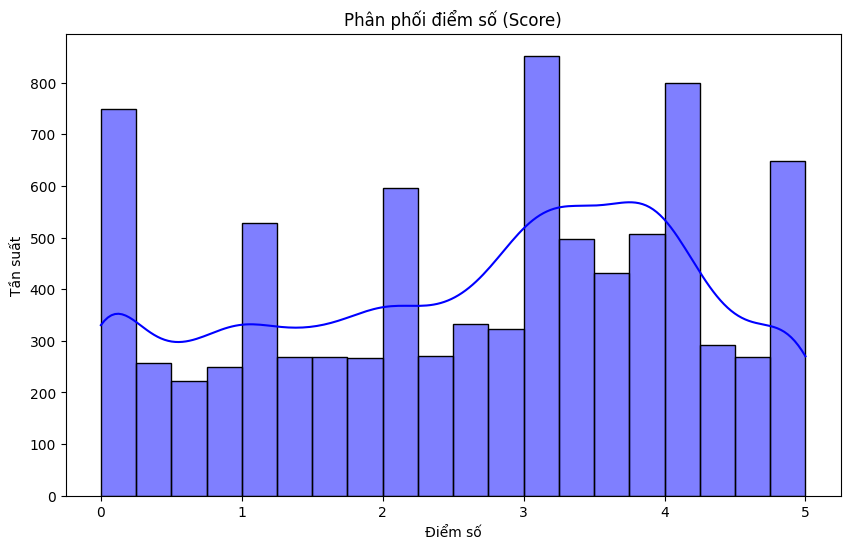

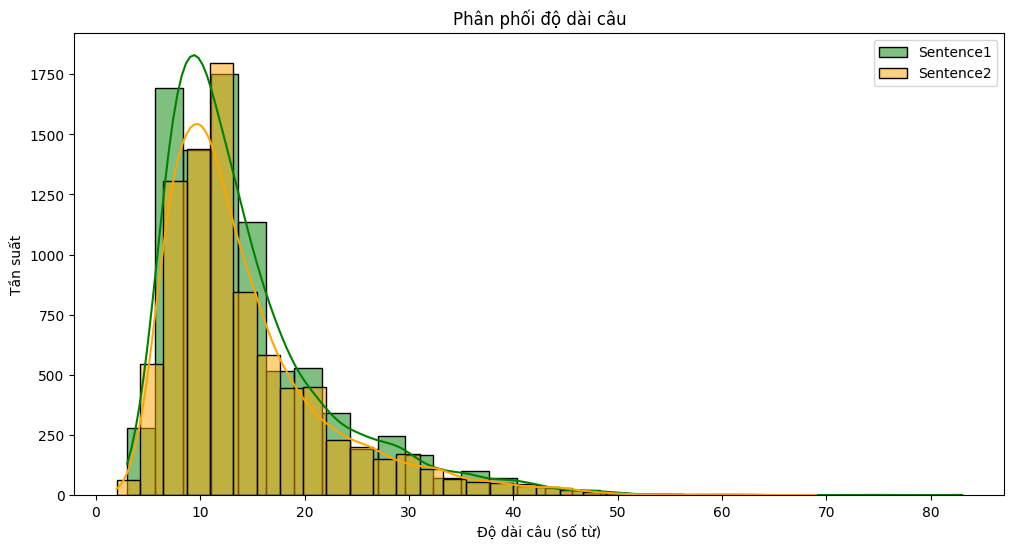

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc bộ dữ liệu (giả sử dữ liệu nằm trong file 'data.csv')
data = pd.read_csv("/content/drive/MyDrive/KL/data/processed_data_vn.csv")

# Hiển thị thông tin tổng quan về dữ liệu
print("\nThông tin tổng quan về dữ liệu:")
print(data.info())

print("\n5 bản ghi đầu tiên trong dữ liệu:")
print(data.head())



# Phân phối điểm số (score)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="score", bins=20, kde=True, color="blue")
plt.title("Phân phối điểm số (Score)")
plt.xlabel("Điểm số")
plt.ylabel("Tần suất")
plt.show()

# Độ dài trung bình của câu trong Sentence1 và Sentence2
data["len_sentence1"] = data["sentence1"].apply(lambda x: len(str(x).split()))
data["len_sentence2"] = data["sentence2"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
sns.histplot(data["len_sentence1"], bins=30, kde=True, color="green", label="Sentence1")
sns.histplot(data["len_sentence2"], bins=30, kde=True, color="orange", label="Sentence2")
plt.title("Phân phối độ dài câu")
plt.xlabel("Độ dài câu (số từ)")
plt.ylabel("Tần suất")
plt.legend()
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentence1  8628 non-null   object 
 1   sentence2  8628 non-null   object 
 2   score      8628 non-null   float64
dtypes: float64(1), object(2)
memory usage: 202.3+ KB


In [3]:
# data gốc
data_1

,Unnamed: 0,split,genre,dataset,year,sid,score,sentence1,sentence2
0,0,train,main-captions,MSRvid,2012test,1,5.00,Một chiếc máy bay đang cất cánh.,Một chiếc máy bay đang cất cánh.
1,1,train,main-captions,MSRvid,2012test,4,3.80,Một người đàn ông đang thổi một cây sáo lớn.,Một người đàn ông đang thổi sáo.
2,2,train,main-captions,MSRvid,2012test,5,3.80,Một người đàn ông đang phết pho mát vụn lên bá...,Một người đàn ông đang phết phô mai vụn lên mộ...
3,3,train,main-captions,MSRvid,2012test,6,2.60,Ba người đàn ông đang chơi cờ.,Hai người đàn ông đang chơi cờ.
4,4,train,main-captions,MSRvid,2012test,9,4.25,Một người đàn ông đang chơi cello.,Một người đàn ông ngồi đang chơi cello.
...,...,...,...,...,...,...,...,...,...
8623,8623,test,main-news,headlines,2016,1354,0.00,"Philippines, Canada cam kết thúc đẩy hơn nữa q...",Philippines cứu 100 người sau khi chìm phà
8624,8624,test,main-news,headlines,2016,1360,1.00,Israel cấm người Palestine khỏi Thành cổ Jerus...,"Giải pháp hai nhà nước giữa người Palestine, I..."
8625,8625,test,main-news,headlines,2016,1368,1.00,Bạn biết bao nhiêu về Mật vụ?,Các nhà lập pháp từ cả hai bên bày tỏ sự phẫn ...
8626,8626,test,main-news,headlines,2016,1420,0.00,Obama đấu tranh để xoa dịu nỗi sợ hãi của Saud...,Myanmar đấu tranh để hoàn tất danh sách cử tri...


In [6]:
# data đã xử lý
data

,sentence1,sentence2,score
0,Một chiếc máy bay đang cất cánh.,Một chiếc máy bay đang cất cánh.,5.00
1,Một người đàn ông đang thổi một cây sáo lớn.,Một người đàn ông đang thổi sáo.,3.80
2,Một người đàn ông đang phết pho mát vụn lên bá...,Một người đàn ông đang phết phô mai vụn lên mộ...,3.80
3,Ba người đàn ông đang chơi cờ.,Hai người đàn ông đang chơi cờ.,2.60
4,Một người đàn ông đang chơi cello.,Một người đàn ông ngồi đang chơi cello.,4.25
...,...,...,...
8623,"Philippines, Canada cam kết thúc đẩy hơn nữa q...",Philippines cứu 100 người sau khi chìm phà,0.00
8624,Israel cấm người Palestine khỏi Thành cổ Jerus...,"Giải pháp hai nhà nước giữa người Palestine, I...",1.00
8625,Bạn biết bao nhiêu về Mật vụ?,Các nhà lập pháp từ cả hai bên bày tỏ sự phẫn ...,1.00
8626,Obama đấu tranh để xoa dịu nỗi sợ hãi của Saud...,Myanmar đấu tranh để hoàn tất danh sách cử tri...,0.00


#model

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split
import pyarrow as pa
import numpy as np

# Kiểm tra nếu có GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Đang sử dụng thiết bị: {device}")

# Đọc dữ liệu
file_path = '/content/drive/MyDrive/KL/data/processed_data_vn.csv'
data = pd.read_csv(file_path)

# Chuyển score thành float
data['score'] = data['score'].astype(float)

model_name = "vinai/phobert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)
model.to(device)

# Đặt mô hình ở chế độ hồi quy
model.config.problem_type = "regression"

# Tiền xử lý: Tokenize
def preprocess_function(examples):
    return tokenizer(
        examples['sentence1'],
        examples['sentence2'],
        truncation=True,
        padding='max_length',
        max_length=128
    )

# Chia dữ liệu
train_data, eval_data = train_test_split(data, test_size=0.2, random_state=42)
train_dataset = Dataset.from_pandas(train_data)
eval_dataset = Dataset.from_pandas(eval_data)

train_dataset = train_dataset.map(preprocess_function, batched=True)
eval_dataset = eval_dataset.map(preprocess_function, batched=True)

# Đặt cột 'score' làm 'labels'
train_dataset = train_dataset.rename_column('score', 'labels')
eval_dataset = eval_dataset.rename_column('score', 'labels')

# Hàm đánh giá
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = predictions.flatten()
    mse = np.mean((predictions - labels)**2)
    rmse = np.sqrt(mse)
    return {"mse": mse, "rmse": rmse}

training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",   
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    report_to="none",
    load_best_model_at_end=True,
    metric_for_best_model="rmse",
    greater_is_better=False
)


#huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

model.save_pretrained('/content/drive/MyDrive/KL/modelphobert_similarity_model_2')
tokenizer.save_pretrained('/content/drive/MyDrive/KL/modelphobert_similarity_model_2')

print("Huấn luyện hoàn tất và mô hình đã được lưu.")


Đang sử dụng thiết bị: cuda


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/6902 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


Map:   0%|          | 0/1726 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
<ipython-input-16-8d885b4663e7>:79: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Mse,Rmse
1,0.810000,0.837432,0.837432,0.915113
2,0.513000,0.711962,0.711962,0.843778
3,0.436800,0.703639,0.703639,0.838832


Huấn luyện hoàn tất và mô hình đã được lưu.


#test model

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load lại mô hình đã huấn luyện
model_path = "/content/drive/MyDrive/KL/modelphobert_similarity_model_2"
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Load lại tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Đặt mô hình lên GPU nếu có
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Hàm để tính toán điểm tương đồng giữa hai câu
def predict_similarity(sentence1, sentence2):
    # Tokenize hai câu đầu vào
    inputs = tokenizer(sentence1, sentence2, return_tensors='pt', truncation=True, padding='max_length', max_length=128)

    # Chuyển inputs lên GPU nếu có
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Mô hình dự đoán
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        score = outputs.logits.item()  # Lấy kết quả dự đoán

    return score

# Nhập thử hai câu từ người dùng
sentence1 = input("Nhập câu thứ nhất: ")
sentence2 = input("Nhập câu thứ hai: ")

# Dự đoán điểm tương đồng ngữ nghĩa giữa hai câu
similarity_score = predict_similarity(sentence1, sentence2)

# Hiển thị kết quả
print(f"Điểm tương đồng ngữ nghĩa giữa hai câu: {similarity_score}")


Nhập câu thứ nhất: đội tuyển việt nam đã giành chiến thắng
Nhập câu thứ hai: đội tuyển đem vinh quang về cho việt nam
Điểm tương đồng ngữ nghĩa giữa hai câu: 3.677614450454712


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load lại mô hình đã huấn luyện
model_path = "/content/drive/MyDrive/KL/modelphobert_similarity_model_2"
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Load lại tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Đặt mô hình lên GPU nếu có
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Hàm để tính toán điểm tương đồng giữa hai câu
def predict_similarity(sentence1, sentence2):
    # Tokenize hai câu đầu vào
    inputs = tokenizer(sentence1, sentence2, return_tensors='pt', truncation=True, padding='max_length', max_length=128)

    # Chuyển inputs lên GPU nếu có
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Mô hình dự đoán
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        score = outputs.logits.item()  # Lấy kết quả dự đoán

    return score

# Nhập thử hai câu từ người dùng
sentence1 = input("Nhập câu thứ nhất: ")
sentence2 = input("Nhập câu thứ hai: ")

# Dự đoán điểm tương đồng ngữ nghĩa giữa hai câu
similarity_score = predict_similarity(sentence1, sentence2)

# Hiển thị kết quả
print(f"Điểm tương đồng ngữ nghĩa giữa hai câu: {similarity_score}")


Nhập câu thứ nhất: đội tuyển việt nam đã giành chiến thắng
Nhập câu thứ hai: đội tuyển việt nam đã giành chiến thắng
Điểm tương đồng ngữ nghĩa giữa hai câu: 4.904208660125732
